In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Preprocess

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')

In [52]:
# preprocess 
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [54]:
df['is_male'] = df.apply(lambda s: int(s['Sex'] == 'male'), axis=1)
df.drop('Sex', axis=1, inplace=True)

In [55]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,0
3,1,3,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,0,3,35.0,0,0,8.0500,1


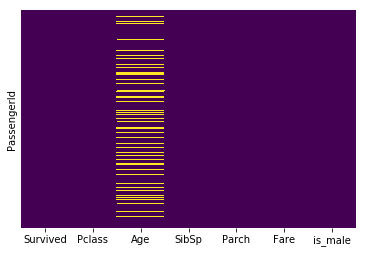

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
df_train= df.fillna(df['Age'].mean())

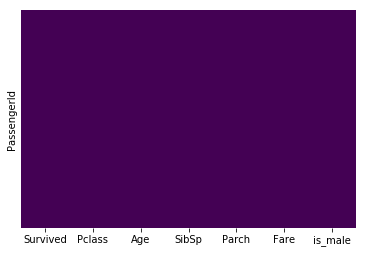

In [58]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,0
3,1,3,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,0,3,35.0,0,0,8.0500,1


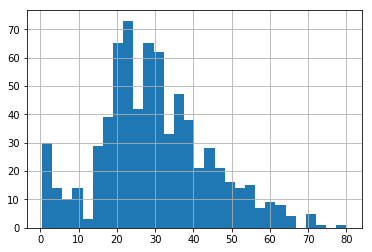

In [64]:
# most people 20-30 years old
age = df['Age'].dropna()
age.hist(bins=30)

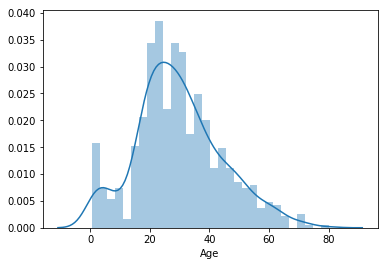

In [68]:
sns.distplot(age, bins=30)

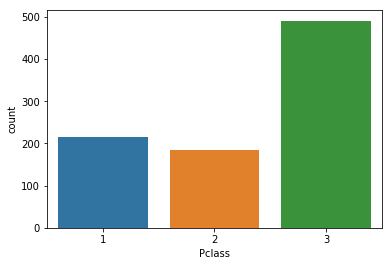

In [70]:
# 3 is poorest
pclass = df['Pclass']
sns.countplot(pclass)

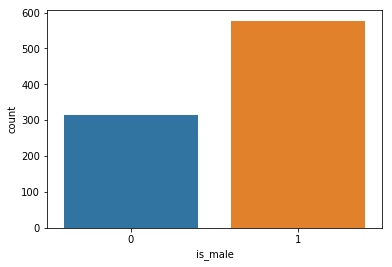

In [74]:
sex = df['is_male']
sns.countplot(sex)

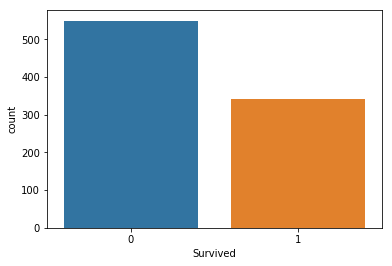

In [75]:
sns.countplot(df['Survived'])

In [77]:
died, survived = df['Survived'].value_counts()
survived /(died + survived)

0.3838383838383838

In [84]:
from sklearn.cross_validation import train_test_split
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

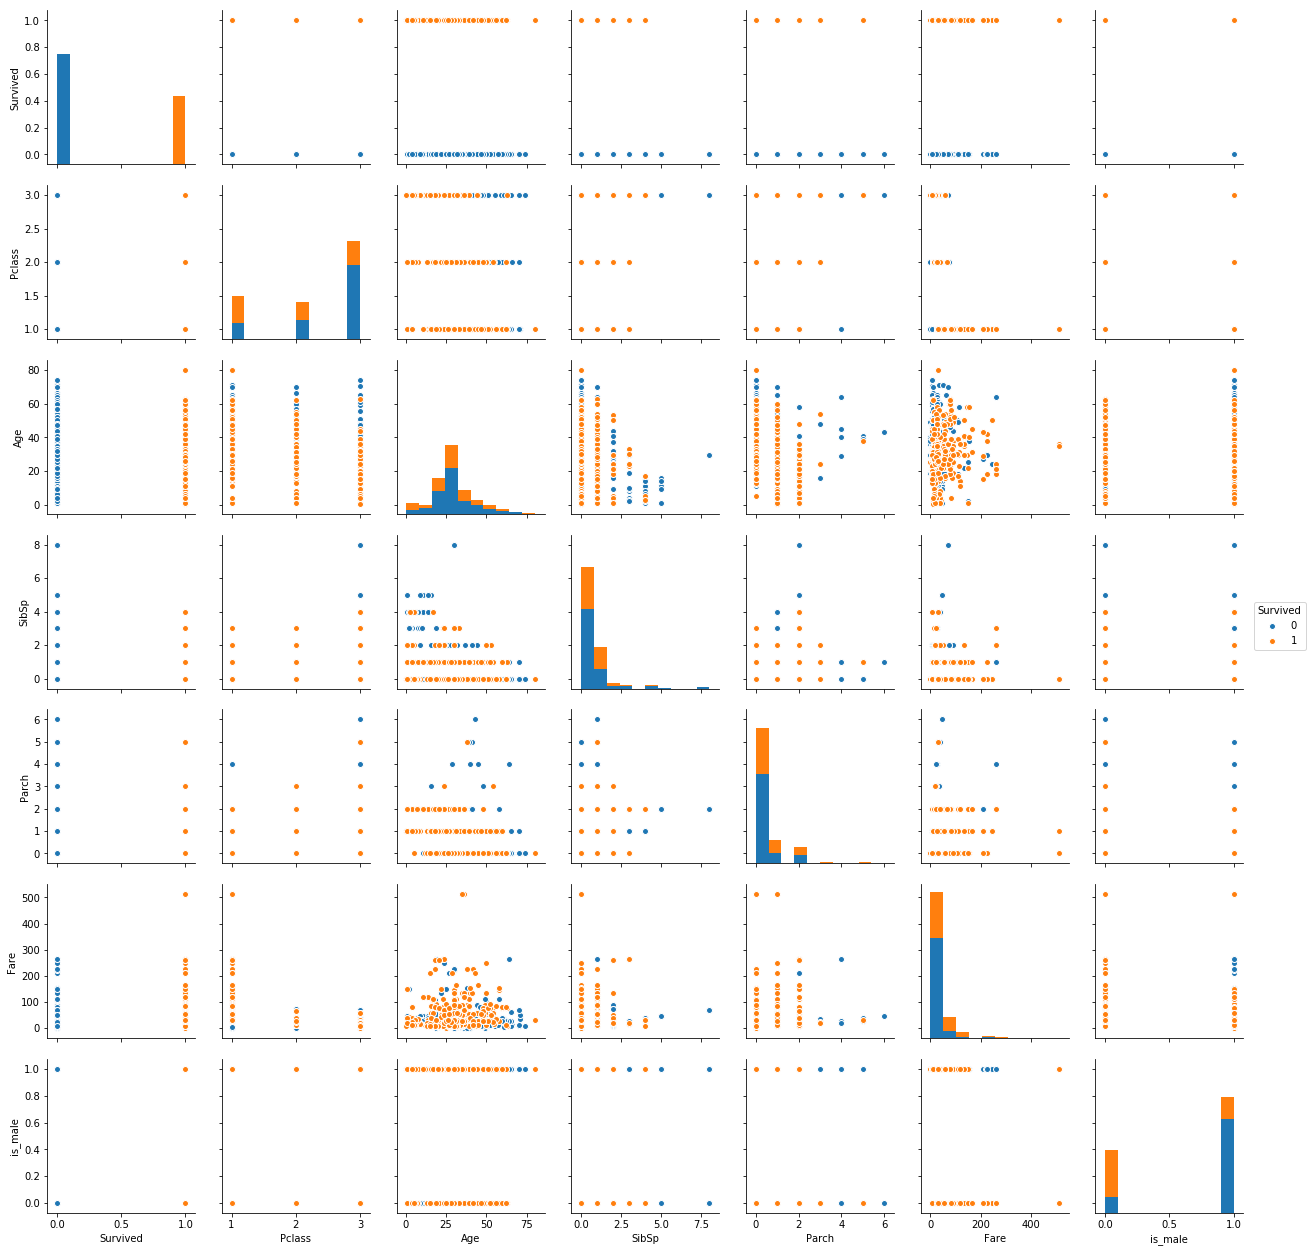

In [79]:
# more people died
# rich people surviveed more often
# age samee distibution
sns.pairplot(df_train, hue='Survived')

# Machine Learning

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel


classifiers = [
    (LogisticRegression(), 'Logistic Regression'),
    (LinearSVC(), 'Linear SVC'),
    (MultinomialNB(), 'Naive Bayes'),
    (BernoulliNB(), 'Bern NB'),
    (RidgeClassifier(), 'RidgeClassifier'),
    (AdaBoostClassifier(), 'Ada'),
    (Perceptron(), 'Perceptron'),
    (PassiveAggressiveClassifier(), 'PassiveAggressiveClassifier'),
    (NearestCentroid(), 'Centroid')
    ]

for c, name in classifiers:
    model = c.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))


Logistic Regression
[[149  20]
 [ 41  85]]
             precision    recall  f1-score   support

          0       0.78      0.88      0.83       169
          1       0.81      0.67      0.74       126

avg / total       0.80      0.79      0.79       295

Linear SVC
[[154  15]
 [ 45  81]]
             precision    recall  f1-score   support

          0       0.77      0.91      0.84       169
          1       0.84      0.64      0.73       126

avg / total       0.80      0.80      0.79       295

Naive Bayes
[[143  26]
 [ 66  60]]
             precision    recall  f1-score   support

          0       0.68      0.85      0.76       169
          1       0.70      0.48      0.57       126

avg / total       0.69      0.69      0.68       295

Bern NB
[[147  22]
 [ 42  84]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       169
          1       0.79      0.67      0.72       126

avg / total       0.78      0.78      0.78       29

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/

In [86]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
predictions = nb.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
      

[[143  26]
 [ 66  60]]
             precision    recall  f1-score   support

          0       0.68      0.85      0.76       169
          1       0.70      0.48      0.57       126

avg / total       0.69      0.69      0.68       295

